# Data Processing
### Convert easy data set to SKELETON features

In [87]:
import cv2
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

from datetime import datetime

from skimage.morphology import skeletonize
from skimage.morphology import thin
from skimage import data
from skimage.util import invert
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage.transform import resize

In [88]:
def one_to_skeleton(frame):
    
    (thresh, frame) = cv2.threshold(frame, 100, 255, cv2.THRESH_BINARY)
    skeleton = skeletonize(frame/255.0).astype(float)

    return skeleton


def to_skeleton(frames):
    return [one_to_skeleton(f) for f in frames]

In [89]:
def to_df_skeleton_only(
    df,
    save_path
):
    df = df.copy()
    
    i = 0
    prev_progress = 0
    size = len(df)
    
    res = []
    for index, row in df.iterrows():
        
        skl = one_to_skeleton(row["image"])
        res.append(skl)

        i += 1
        cur_progress = int((i+1)*100/size)
        if cur_progress >= prev_progress + 2:
            print(f"progress: {cur_progress}%")
            print(f"processing {index} at {datetime.now()}")
            prev_progress = cur_progress
            
    df["image"] = res
    df.to_pickle(save_path)

    return df

In [90]:
from nebula.common import write_pickle, read_pickle, display

In [91]:
image_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df.pkl'
skl_pickle_path = 'C:/Users/aphri/Documents/t0002/pycharm/data/yg_ar/image_easy2_df_skeleton.pkl'

In [92]:
df = read_pickle(image_pickle_path)

In [93]:
df["image"].iloc[0]

array([[23, 23, 23, ..., 23, 23, 23],
       [24, 24, 24, ..., 24, 24, 24],
       [24, 24, 24, ..., 24, 24, 24],
       ...,
       [40, 40, 40, ..., 40, 40, 40],
       [39, 39, 39, ..., 40, 40, 40],
       [39, 39, 39, ..., 41, 40, 40]], dtype=uint8)

In [94]:
skl = one_to_skeleton(df["image"].iloc[0])

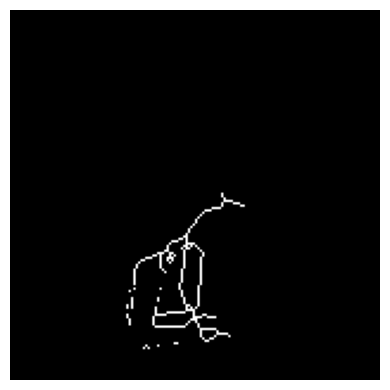

In [95]:
display(skl)

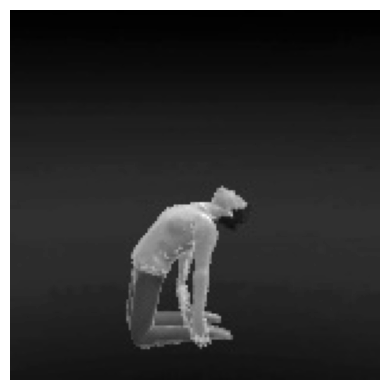

In [96]:
display(df["image"].iloc[0])

In [97]:
to_df_skeleton_only(df, skl_pickle_path)

progress: 2%
processing 398 at 2023-04-17 18:59:36.589553
progress: 4%
processing 798 at 2023-04-17 18:59:36.854810
progress: 6%
processing 1198 at 2023-04-17 18:59:37.199140
progress: 8%
processing 1598 at 2023-04-17 18:59:37.534276
progress: 10%
processing 1998 at 2023-04-17 18:59:37.867649
progress: 12%
processing 2398 at 2023-04-17 18:59:38.175744
progress: 14%
processing 2798 at 2023-04-17 18:59:38.473959
progress: 16%
processing 3198 at 2023-04-17 18:59:38.786263
progress: 18%
processing 3598 at 2023-04-17 18:59:39.132941
progress: 20%
processing 3998 at 2023-04-17 18:59:39.465376
progress: 22%
processing 4398 at 2023-04-17 18:59:39.807105
progress: 24%
processing 4798 at 2023-04-17 18:59:40.121580
progress: 26%
processing 5198 at 2023-04-17 18:59:40.402293
progress: 28%
processing 5598 at 2023-04-17 18:59:40.697926
progress: 30%
processing 5998 at 2023-04-17 18:59:41.012202
progress: 32%
processing 6398 at 2023-04-17 18:59:41.358031
progress: 34%
processing 6798 at 2023-04-17 18

,image,label_a,label_at,file_name
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1012_XOP4_YOP2...
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1031_XOP3_YON4...
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1052_XOP1_YOP8...
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1056_XON9_YON3...
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1081_XOP13_YOP...
...,...,...,...,...
19995,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z957_XON15...
19996,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z963_XON7_...
19997,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z979_XOP11...
19998,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",warrior_II,warrior_II_4,warrior_II_4_hair_3_cloth_3_pants_1_Z983_XOP1_...


In [98]:
skl_df = pd.read_pickle(skl_pickle_path)

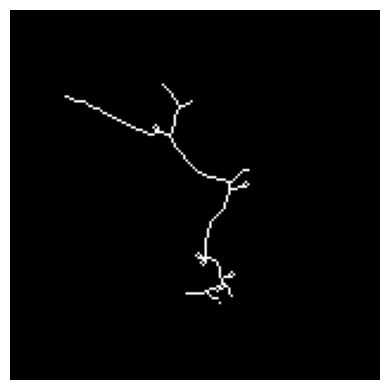

In [99]:
display(skl_df["image"].iloc[2801])

In [100]:
skl_df.head()

,image,label_a,label_at,file_name
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1012_XOP4_YOP2...
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1031_XOP3_YON4...
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1052_XOP1_YOP8...
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1056_XON9_YON3...
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",camel,camel_1,camel_1_hair_0_cloth_0_pants_3_Z1081_XOP13_YOP...
